In [26]:
import torch
import torchvision.models as models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
from torch.nn import functional as F
import cv2

In [27]:
transform =transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),
                             (0.5,0.5,0.5))])

In [28]:
classes=['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion Red Peeled', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams', 'Pepino', 'Pepper Green', 'Pepper Orange', 'Pepper Red', 'Pepper Yellow', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Plum 2', 'Plum 3', 'Pomegranate', 'Pomelo Sweetie', 'Potato Red', 'Potato Red Washed', 'Potato Sweet', 'Potato White', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Heart', 'Tomato Maroon', 'Tomato Yellow', 'Tomato not Ripened', 'Walnut', 'Watermelon']
len(classes)

131

In [29]:
resnet = models.resnet152(pretrained=True)

In [32]:
in_features = resnet.fc.in_features
resnet.fc=nn.Linear(in_features, 114)
print(resnet.fc)

Linear(in_features=2048, out_features=114, bias=True)


In [33]:
resnet.load_state_dict(torch.load('E:/Stud/AI/dataset/CNN/Fruit-Image-Dataset/fruit_image_model.h5',map_location=torch.device('cpu')))

<All keys matched successfully>

In [34]:
device=("cuda:0" if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [35]:
def im_convert(tensor):  
      image = tensor.cpu().clone().detach().numpy() # This process will happen in normal cpu.
      image = image.transpose(1, 2, 0)
      image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
      image = image.clip(0, 1)
      return image

image saved
tensor([65])
image saved
tensor([7])
image saved
tensor([65])
image saved
tensor([7])
image saved
tensor([7])
image saved
tensor([65])
image saved
tensor([65])
image saved
tensor([7])
image saved
tensor([65])
image saved
tensor([7])
image saved
tensor([65])
image saved
tensor([65])
image saved
tensor([7])
image saved
tensor([65])
image saved
tensor([65])


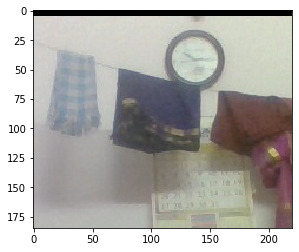

In [42]:
video_capture=cv2.VideoCapture(0)
flag=True
while True:
    ret,frame=video_capture.read()
    if flag:
        f=cv2.resize(frame, (50,50), fx =0, fy = 0, 
                             interpolation = cv2.INTER_CUBIC)
        cv2.imwrite("E:/Stud/AI/programs/test_images/NewPicture.jpg",frame)
        read=Image.open("E:/Stud/AI/programs/test_images/NewPicture.jpg")
        top=55
        left=220
        right=440
        bottom=240
        cropped=read.crop((left,top,right,bottom))
        plt.imshow(cropped)
        print("image saved")
        flag=False
        font = cv2.FONT_HERSHEY_DUPLEX
        img=transform(cropped)
        image=img.to(device).unsqueeze(0)
        output=resnet(image)
        _,pred=torch.max(output,1)
        name="Unknown"
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    flag=not flag
    name=classes[pred.item()] 
    print(pred)
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 0, 0), 2)
    cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (255, 0, 0), cv2.FILLED)
    cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
    cv2.imshow('Image Classifier',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
video_capture.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 